In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataGen = ImageDataGenerator( rescale=1./255)
imgGen = dataGen.flow_from_directory( './image', target_size=(98,98))

Found 20 images belonging to 2 classes.


In [ ]:
## 100개의

In [3]:
x_data, y_data = imgGen.next()

In [4]:
x_data.shape

(20, 98, 98, 3)

In [5]:
imgGen.class_indices

{'cat': 0, 'dog': 1}

In [6]:
x_data[0].shape

(98, 98, 3)

[]

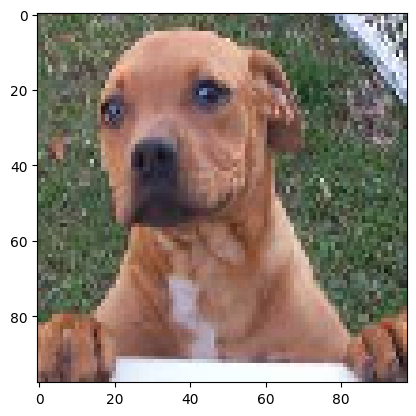

In [7]:
plt.imshow( x_data[0] )
plt.plot()

In [8]:
y_data[0]

array([0., 1.], dtype=float32)

In [ ]:
# model = Sequential()
# model.add( Flatten( input_shape=(98,98,3)) )
# model.add( Dense( units=64,  activation='relu') )
# model.add( Dense( units=32,  activation='relu') )
# model.add( Dense( units=2,  activation='softmax') )
# model.compile( loss='categorical_crossentropy', 
#               optimizer=Adam( 0.001 ), metrics=['acc'])
# #model.fit( x_data, y_data, epochs= 100 )/
# model.fit( imgGen, epochs=100)

In [ ]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), strides=1, 
                  input_shape=(98,98,3), padding='same', activation='relu' ) )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu' ) ) 
model.add( MaxPool2D( pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense( units=64,  activation='relu') )
model.add( Dense( units=32,  activation='relu') )
model.add( Dense( units=2,  activation='softmax') )
model.compile( loss='categorical_crossentropy', 
              optimizer=Adam( 0.001 ), metrics=['acc'])
#model.fit( x_data, y_data, epochs= 100 )/
model.fit( imgGen, epochs=100)

In [12]:
model.save( 'catdog.h5')

c:\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<class 'PIL.Image.Image'>


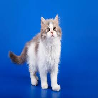

In [21]:
testImg = load_img( 'test.jpg', target_size=(98,98))
print( type(testImg))
testImg

In [24]:
imgArr = img_to_array(testImg)/255
imgArr.shape

(98, 98, 3)

In [25]:
98*98*3

28812

In [ ]:
1x28812 28812x64 = 1x64 64x32  1x32 32x2  =1x2

In [27]:
model.predict( imgArr.reshape(1,98, 98, 3)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([1], dtype=int64)